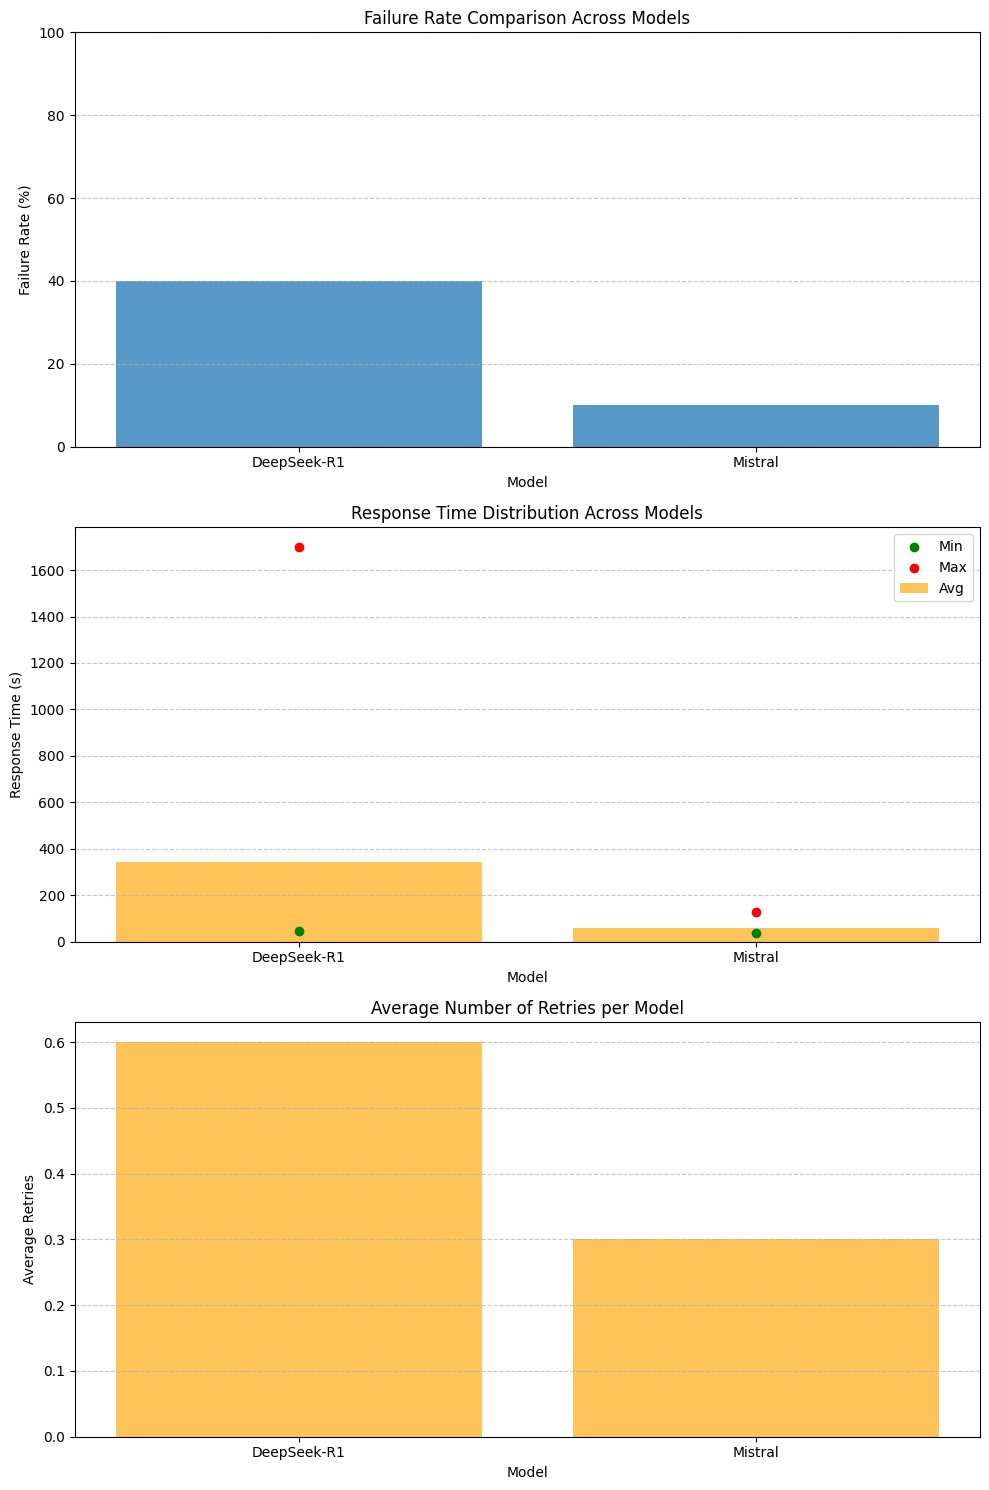

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the benchmark results from CSV
df_results = pd.read_csv('../benchmark_results.csv')

# Compute statistics
stats_df = df_results.groupby("Model").agg({
    "Valid JSON": ["count", "sum", lambda x: 100 * (1 - x.mean())],  # Total, valid count, failure rate (%)
    "Retries": ["mean", "max"],  # Average & max retries
    "Response Time (s)": ["mean", "min", "max"]  # Response time stats
}).reset_index()

# Rename columns for clarity
stats_df.columns = [
    "Model", "Total Trials", "Valid JSON Count", "Failure Rate (%)",
    "Avg Retries", "Max Retries", "Avg Response Time (s)", "Min Response Time (s)", "Max Response Time (s)"
]

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Failure Rate Comparison
axes[0].bar(stats_df["Model"], stats_df["Failure Rate (%)"], alpha=0.75)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("Failure Rate (%)")
axes[0].set_title("Failure Rate Comparison Across Models")
axes[0].set_ylim(0, 100)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Plot 2: Response Time Distribution
axes[1].bar(stats_df["Model"], stats_df["Avg Response Time (s)"], label="Avg", color="orange", alpha=0.65)
axes[1].scatter(stats_df["Model"], stats_df["Min Response Time (s)"], color="green", label="Min", marker="o")
axes[1].scatter(stats_df["Model"], stats_df["Max Response Time (s)"], color="red", label="Max", marker="o")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("Response Time (s)")
axes[1].set_title("Response Time Distribution Across Models")
axes[1].legend()
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Plot 3: Average Retries per Model
axes[2].bar(stats_df["Model"], stats_df["Avg Retries"], color="orange", alpha=0.65)
axes[2].set_xlabel("Model")
axes[2].set_ylabel("Average Retries")
axes[2].set_title("Average Number of Retries per Model")
axes[2].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("benchmark_analysis.png")

# Display the figure
plt.show()


In [2]:
print(stats_df)

         Model  Total Trials  Valid JSON Count  Failure Rate (%)  Avg Retries  \
0  DeepSeek-R1            10                 6              40.0          0.6   
1      Mistral            10                 9              10.0          0.3   

   Max Retries  Avg Response Time (s)  Min Response Time (s)  \
0            3                343.533                  46.48   
1            3                 57.575                  39.22   

   Max Response Time (s)  
0                1698.91  
1                 129.30  


In [13]:
df_results['Generated Transactions']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) # Show full column content